In [15]:
%pylab nbagg
import os
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib


# Exploring longer time series


The scripting interface has two interactive tools for looking at the 
TimeSeries generated in simulations. This tutorial shows an example of
their use, using a demo dataset for region time-series.

These are mainly of use for longer simulations, of at least a few seconds.

## Example data

As a simple set of example data, we will use a linear stochastic model with the default connectivity:

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


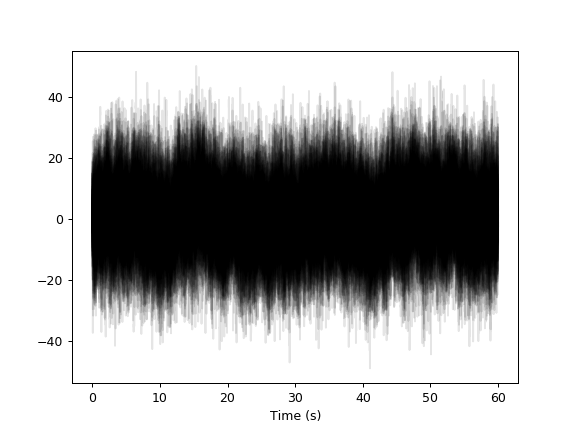

Text(0.5,0,u'Time (s)')

In [16]:
connectivity=connectivity.Connectivity.from_file()
connectivity.speed=numpy.array([1.0])

sim = simulator.Simulator(
    connectivity=connectivity,
    coupling=coupling.Linear(a=numpy.array([2e-4])),
    integrator=integrators.EulerStochastic(dt=10.0),
    model=models.Linear(gamma=numpy.array([-1e-2])),
    monitors=(monitors.Raw(),),
    simulation_length=60e3
).configure()

(time, data), = sim.run()

figure()
plot(time/1e3, data[:, 0, :, 0], 'k', alpha=0.1);
xlabel('Time (s)')


## Create a TimeSeriesRegion Datatype


Because we just stored our simulation as a simple array, we need to turn it into one of 
TVB's TimeSeries datatypes, which is what the two plotting tools operate on, in this case 
we'll use TimeSeriesRegion.

In [17]:
tsr = time_series.TimeSeriesRegion(
    data=data,
    connectivity=sim.connectivity,
    sample_period=sim.monitors[0].period / 1e3,
    sample_period_unit='s')
tsr.configure()
tsr

,value
Dimensions,"('Time', 'State Variable', 'Region', 'Mode')"
Length,60.0
Region Mapping,None
Region Mapping Volume,None
Sample period,0.01
Source Connectivity,Connectivity gid: 10e43d3e-b568-4c81-adc8-6dcdbc8ef064
Time units,s
Time-series name,TimeSeriesRegion gid: f9f4bdec-114d-410d-8a47-f4d5d1cd7d18
Time-series type,TimeSeriesRegion
"[min, median, max]","[-48.9334, 0.841129, 50.0263]"


Create And Launch A TimeSeriesInteractive
------------------------------------------

Our typical approach throughout these tutorials has been to to simply plot our time-series 
using PyLab's plot() function. This is fine as a quick way to look at the small amounts of 
data we'd been producing, but is insufficient for longer, more meaningful, time-series, 
such as we get when trying to runs simulations aimed at generating time-series comparable 
to experimental data. 

TimeSeriesInteractive is a tool for looking at these longer time-series. It's still 
relatively simple, but it adds a number of useful features. The time-series are plotted
in the main central panel with a constant vertical offset, the label for each channel or
region displayed down the left hand side. Along the bottom are three basic controls:
on the left there is a slider that allows the length of the window to be changed (in 
physical units); in the middle a set of buttons exist to step forward and backward 
through the time-series at different speeds (at the top of the window there is an 
indicator showing where you are in the time-series); and on the right the vertical 
spacing, or offset between time series can be set, this has the effect of scaling the 
time-series' amplitudes.

<IPython.core.display.Javascript object>


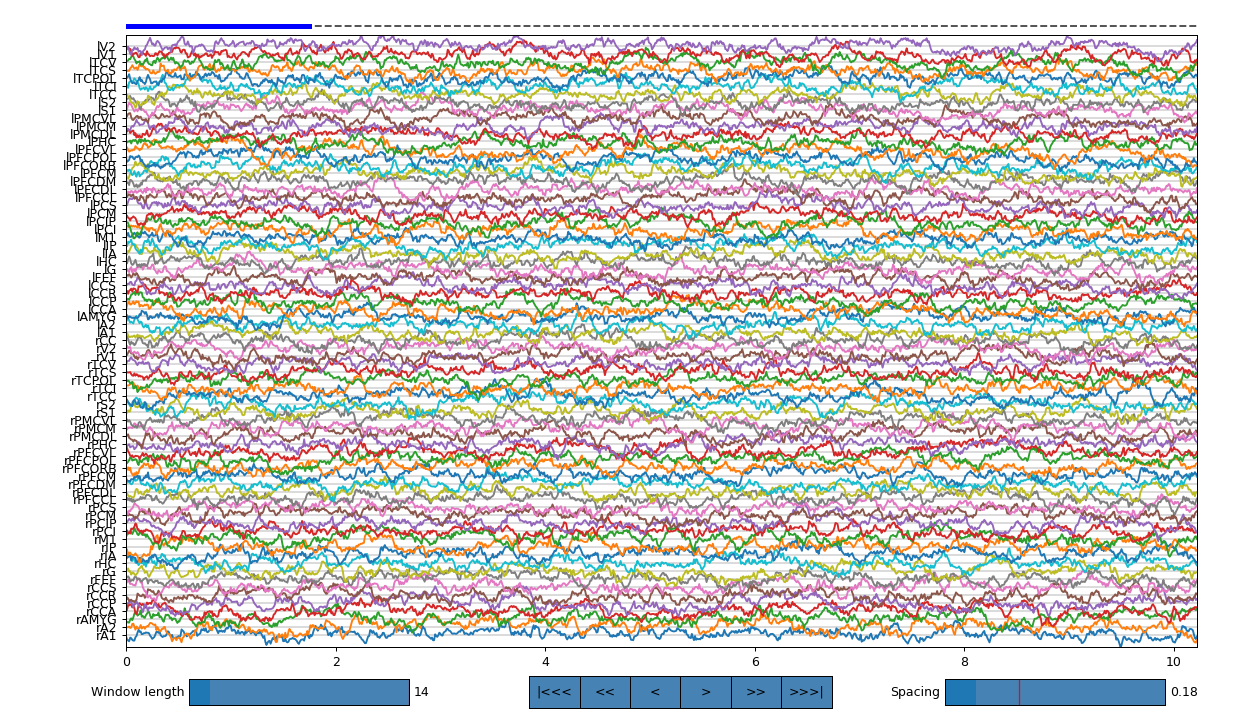

In [18]:
#Create and launch the interactive visualiser
import tvb.simulator.plot.timeseries_interactive as ts_int
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()